

**If using CoLab download your data and any necessarey python libraries:**

In [1]:
using_colab = True

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/raw/main/data_Nick_HomeDepot_EdChiles2.xlsx'
    !wget 'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/raw/main/data_Nick_HomeDepot_white.xlsx'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/sts_nasa.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/Spectrum.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_color.gif'
    !wget 'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png'
    #!wget -r  'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/photos/'
    !wget 'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/photos.zip'

    #https://colab.research.google.com/github/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx


    !pip install ipywidgets
    !pip install --upgrade scikit-learn
    #####!pip install ipympl

    !pip install altair
    !pip install panel
    !pip install pillow
    
    !unzip photos.zip


![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/sts_nasa.png?raw=1)


# **Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer**

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site,

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better".

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range.

>![image](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Spectrum.png?raw=1)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/

The following is a sample-by-sample animation of the type of data acquired from STELLA-Q2 Spectrometer built by STS. STS is providing the python code in a Jupyter Notebook that can be used as an example of how to display the data from the STELLA-Q2 device. We have also provided some sample data to be used with this notebook. It should be noted that we did change the name of some of the headers created from our instrument to add colors to each of the wavelength reading that are made in order to display each wavelength as a corresponding color. The near infrared wavelength readings are colored in grays, wheat and gold where the normal visible spectrum colors are in vivid colors that they represent.

>
>![image](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/STELLA_color.gif?raw=1)
>



### Load Python requirments:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, FloatRangeSlider, Layout



# **Load STELLA Data and setup this project.**


## 1) Load the Excel data collected on the STELLA-Q2 micro SD card:
---


## 2) Read in only the _First Line_ of average White-Card data for full-sun normailzation:
---

Data Includes:
- STELLA data for all Test Patterns called 'data_Nick_HomeDepot_EdChiles2.xlsx'
- STELLA White-Card data called 'data_Nick_HomeDepot_white.xlsx'


## 3) Define colors and labels for each Test Pattern for this project:
---



In [4]:
# 1) read the STELLA data file
file = r'data_Nick_HomeDepot_EdChiles2.xlsx'
df = pd.read_excel(file,index_col=False)



# 2) read the White-Card data file
file_white = r'data_Nick_HomeDepot_white.xlsx'
white = pd.read_excel(file_white,index_col=False, nrows=1)



# 3) Define Name and Colors for each unique value in the 'Test' column
# Define Name and Colors for each unique value in the 'Test' column
test_colors = {
            'Asphalt':'gray',
            'Palm':'lime',
            'Broad Leaf':'orange',
            'Piney':'aquamarine',
            'Big Leaf':'lightgray',
            'Coral':'salmon',
            'More Green Plant':'gold',
            'Green Plant':'violet',
            'Yellow Shrub':'yellow',
            'Red Broad Leaf':'red',
            'Vgreen':'green',
            'Red Plant':'blue',
            'Leafy':'deepskyblue',
            'Pink Flower':'pink',
            'White Card':'darkgray'
            }


In [5]:
# Remove leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()
df.head()

,device_type,software_version,UID,Test_number,Test,ImageName,batch,weekday,timestamp_iso8601,decimal_hour,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,0,Asphalt,./photos/Asphalt.jpg,3,Saturday,20240427T215429Z,21.9080,...,900,10,369.528,44.343,940,10,221.470,26.576,4.12,92
1,STELLA-Q2,2.4.0,6858,1,Asphalt,./photos/Asphalt.jpg,3,Saturday,20240427T215430Z,21.9083,...,900,10,366.194,43.943,940,10,220.588,26.471,4.12,92
2,STELLA-Q2,2.4.0,6858,2,Asphalt,./photos/Asphalt.jpg,3,Saturday,20240427T215432Z,21.9089,...,900,10,367.305,44.077,940,10,220.588,26.471,4.12,92
3,STELLA-Q2,2.4.0,6858,3,Asphalt,./photos/Asphalt.jpg,3,Saturday,20240427T215433Z,21.9092,...,900,10,366.194,43.943,940,10,220.588,26.471,4.12,92
4,STELLA-Q2,2.4.0,6858,4,Palm,./photos/Palm.jpg,1,Friday,20240531T201526Z,20.2572,...,900,10,1930.440,231.652,940,10,879.704,105.564,4.12,92


In [6]:
# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,Average,2.4.0,6858,White Card,17,Friday,20240531T202709Z,20.454573,20,20,...,900,10,4477.120909,537.254545,940,10,2717.640909,326.116909,4.118182,92


In [7]:
# Raw data plots
def update_plot_dashed(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                #color = 'black'  # Default color for wavelengths not explicitly defined
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value


                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')
 
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,950)
    #plt.ylim(0,1500)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

    
    
    
# White-Card average data    
def update_plot_white_card():
    plt.figure(figsize=(12, 6))


    # Loop over the range of timestamp indices
    for timestamp_index in range(0, 0 + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in white.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(white[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=4, color='white')

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')
 
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    #plt.ylim(0,30000)
    plt.grid()
    plt.title(f"Raw Readings Irradiance Over Wavelength for Average White-Card data")
    #plt.title(f"White and Gray Card Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()
 
    
# White-Card Corrected Data  
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]
            
            
            
            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]
            #print(scaling_factor)
            #corrected_irradiance_data = irradiance_data * scaling_factor

            
            for column in wavelength_columns:
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index]* scaling_factor)

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')
 
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400,950)
    plt.ylim(0,1.1)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()


# Plot NDVI data    
def plot_ndvi():
 
    # Create subplots
    fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

    # Plot Red channel
    #axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
    axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o', linestyle='dotted', color='red',label = 'Red')
    axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
    axs[0].set_title('Red Channel', color='red')
    axs[0].grid()
    axs[0].set_ylim(0,1.1)



    # Plot NIR channel
    #axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
    axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
    axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
    axs[1].set_title('NIR Channel', color='blue')
    axs[1].grid()
    axs[1].set_ylim(-0.2,1.)



    # Plot NDVI
    #axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
    axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
    #axs[2].plot(df['NIRv'], marker='d', markersize =4,linestyle='dotted', color='purple', label = "NIRv")

    # Loop through each unique test pattern and plot its NDVI values as a time series
    for test_pattern, color in test_colors.items():
        # Filter the DataFrame for the current test pattern
        pattern_data = df[df['Test'] == test_pattern]

        # Plot NDVI values for the current test pattern
        axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


    # Set x-axis ticks to be the index of each row in the DataFrame
    x_labels = df['Test']
    axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green' , label = "NDVI")
    #axs[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    axs[2].set_ylabel('NDVI', color='green')
    axs[2].set_title('NDVI', color='green')
    axs[2].set_ylim(-0.1,1.)
    axs[2].grid()



    axs[3].plot(df['timestamp_iso8601'], test_number, marker='o', linestyle='dotted', color='black',label="STELLA Reading Patterns")
    axs[3].set_ylabel('Test Pattern', color='purple')
    axs[3].set_title('Test Pattern and Clusters', color='purple')
    axs[3].grid()
    axs[3].set_ylim(0,16)
    plt.legend()


    # Plot every other x-label
    plt.xticks(ticks=range(len(df)), labels=['' if i % 1 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')


    '''
    for test_pattern, color in test_colors.items():
        # Filter the DataFrame for the current test pattern
        pattern_data = df[df['Test'] == test_pattern]

        # Plot NDVI values for the current test pattern
        plt.plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


        # Set common xlabel
        #plt.xlabel('Timestamp (ISO8601)', color=color)
    '''

    # Set common xlabel
    #plt.xlabel('Timestamp (ISO8601)', color='green')

    # Show the plot
    plt.tight_layout()
    plt.show()

    
        
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))

    

# **Plot Raw Data Over a Continuous Sample Range:**

In [8]:
# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot_dashed, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 50), description='Timestamp Range', layout=Layout(width='90%'),…

 

---
---
---
# **Plot the Average White-Card Reading:**

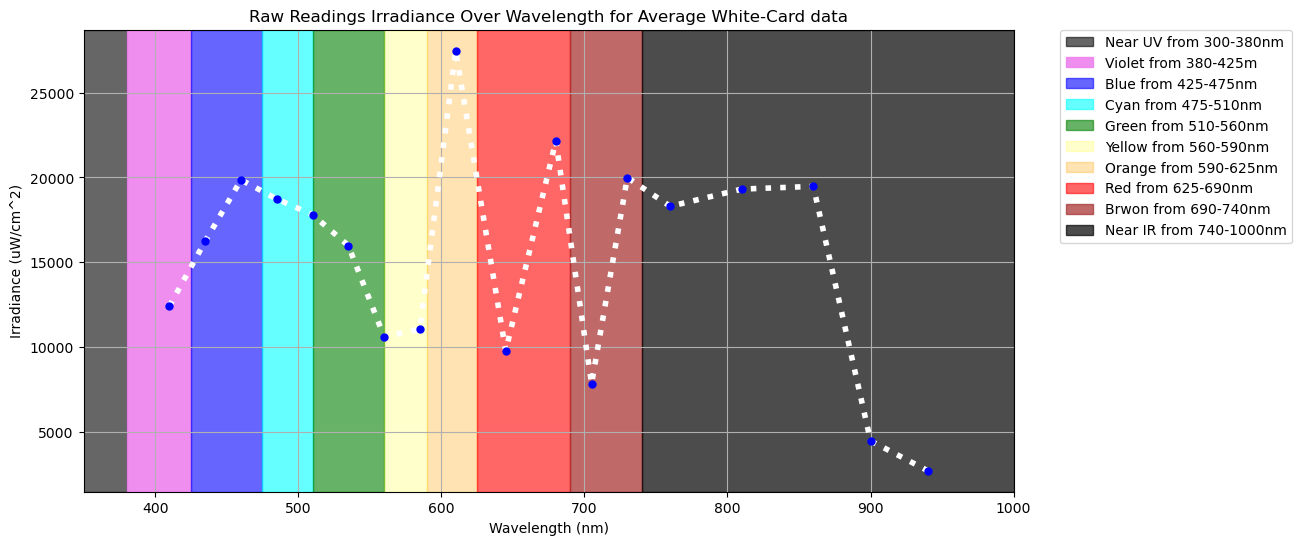

In [9]:
update_plot_white_card()

## **In the above plot for our white standard, there is a large range of magnitudes across what should be a uniform white specrtum.** 

- This is probably related to instrument detector bias.

- Our STS STELLA instrument always has a strong peak at 610nm.

---
---
### **Normalize all STELLA-Q2 Readings to our White-Card Calibration data:**


In [10]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aquamarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading
            
#print()
#print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')

print()
print('1) These are our White-Card wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')


scaling_factor_save = []
# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor
    scaling_factor_save.append(scaling_factor)

#print('normalization_factors_saved:',scaling_factor_save)    
    
print()
print('2) These are our White-Card Normalization factors for each Wavelength:',scaling_factors)

# Print scaling factors

k=0
print()
print("Normalization Factors by Wavelength:")
for wavelength, factor in scaling_factors.items():
    print(f"3) These are our final Normalization factors for each wavelength {wavelength}nm: {factor} \tline {k}")
    k=k+1

    
#print([scaling_factors[factor] for wavelength in wavelengths])    


1) These are our White-Card wavelengths and readings from our spectrometer: {'410': 12425.436363636363, '435': 16248.845454545457, '460': 19857.518181818185, '485': 18727.88181818182, '510': 17806.14545454545, '535': 15983.59090909091, '560': 10612.636363636362, '585': 11068.881818181817, '610': 27466.08181818182, '645': 9779.031818181818, '680': 22157.045454545456, '705': 7849.564545454546, '730': 19993.2, '760': 18297.85454545455, '810': 19312.49090909091, '860': 19474.081818181818, '900': 4477.12090909091, '940': 2717.640909090909} used with wavelength 940 nm.

2) These are our White-Card Normalization factors for each Wavelength: {'410': 8.048007093952434e-05, '435': 6.154283409226836e-05, '460': 5.035876038706658e-05, '485': 5.339632157594874e-05, '510': 5.616038589332795e-05, '535': 6.256416381573147e-05, '560': 9.422729336382873e-05, '585': 9.034336226784837e-05, '610': 3.6408542238377315e-05, '645': 0.00010225961205492085, '680': 4.5132371193238345e-05, '705': 0.00012739560191

---
# **Plot White-Card Normalized Spectral Data Over a Range of Readings:**


In [11]:
# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Add a Boost component to Shady or Cloudy White Card readings
#boost_slider = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description='Boost',orientation='horizontal',layout=Layout(width='90%'))


# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 50), description='Timestamp Range', layout=Layout(width='90%'),…

![image](Backyard_colors.png) 


---
# **Calculate Normalized Difference Vegetative Index:**

    NDVI = (NIR Channel - Red Channel)/(NIR Channel + Red Channel)
    
    NDVI = (860nm - 645nm) / (860nm + 645nm)

## Define Red and NIR Spectral Channels and calculate NDVI.

In [12]:
# Calculate NDVI                                                            Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]      # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test']
df['NDVI']  =   ndvi_values

## Plot NDVI as a Time Series.

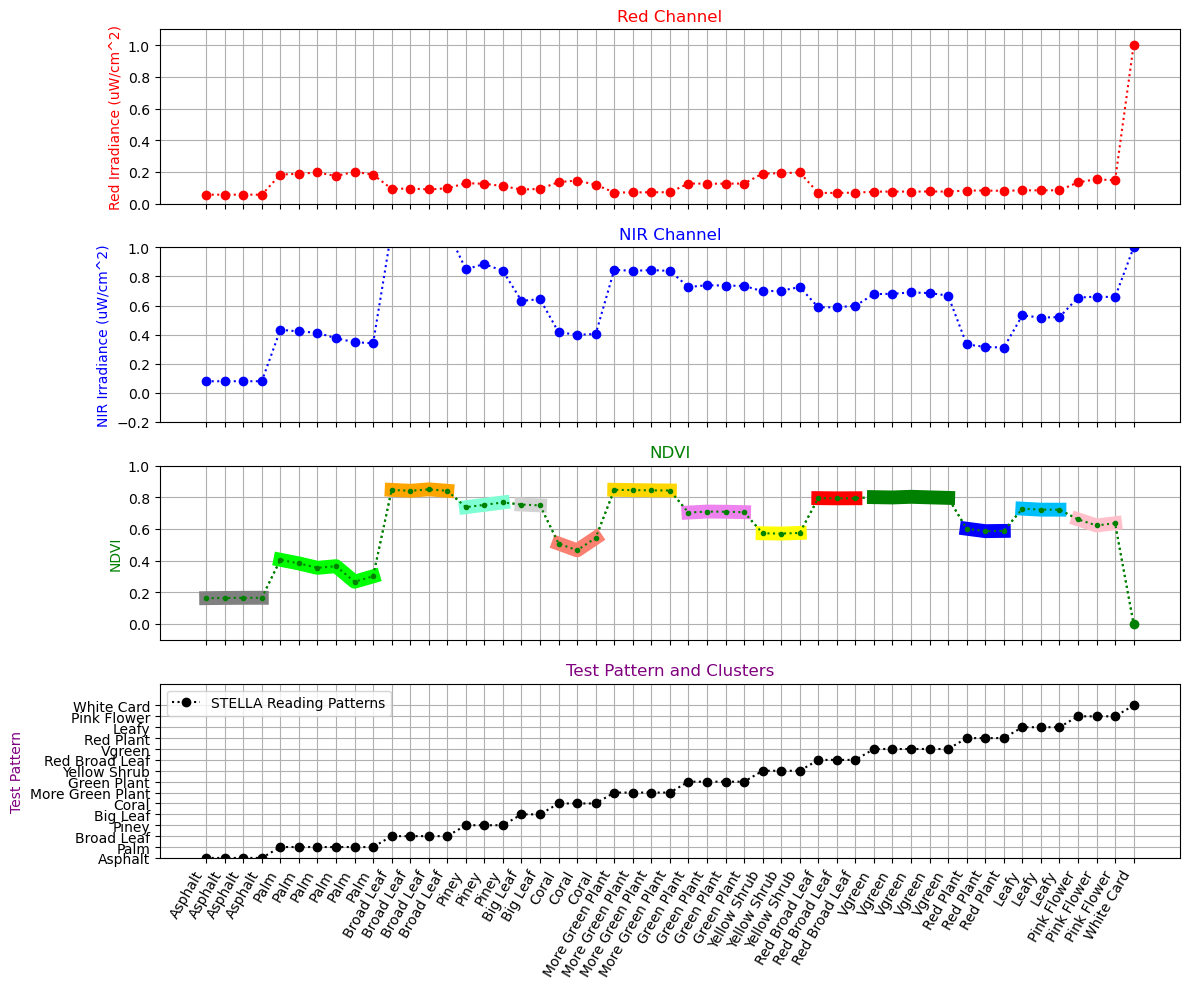

In [13]:
plot_ndvi()

![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png?raw=1)



---
---
---


# Altair NDVI Plots:

In [14]:
import altair as alt
import panel as pn

alt.data_transformers.disable_max_rows()

#pn.extension('vega')
pn.extension('tabulator')

pn.extension(sizing_mode = 'stretch_width')

import base64, io, IPython
from PIL import Image as PILImage


In [15]:
# Resize, rotate, and encode images to base64
def resize_rotate_and_encode_image(image_path, size=(250, 250)):
    image = PILImage.open(image_path)
    image = image.resize(size)  # Resize image to the desired size
    image = image.rotate(-90, expand=True)  # Rotate image 90 degrees clockwise
    output = io.BytesIO()
    image.save(output, format='jpeg')  # Use JPEG if you are encoding as jpeg
    encoded_string = "data:image/jpeg;base64," + base64.b64encode(output.getvalue()).decode()
    return encoded_string


df['image'] = df['ImageName'].apply(lambda x: resize_rotate_and_encode_image(x))

alt.HConcatChart(...)
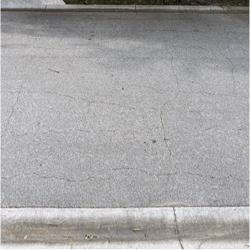
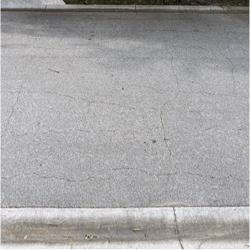
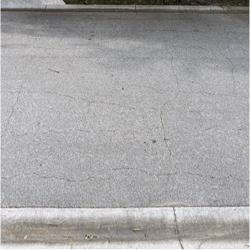
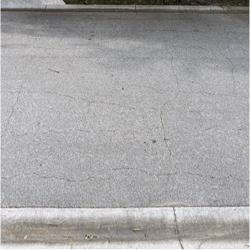
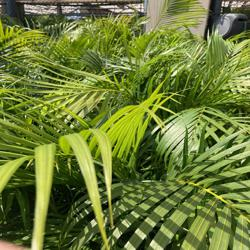
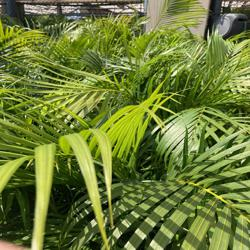
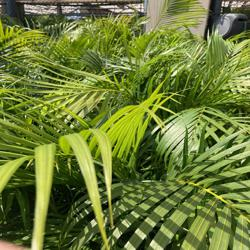
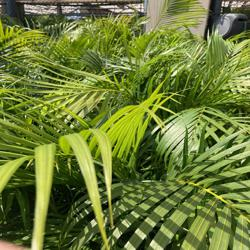
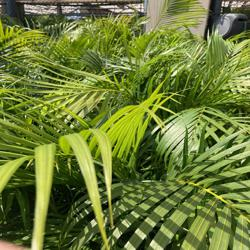
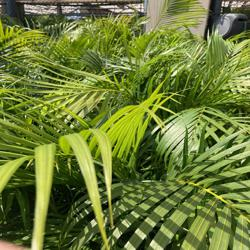
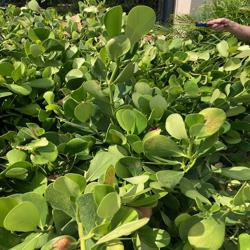
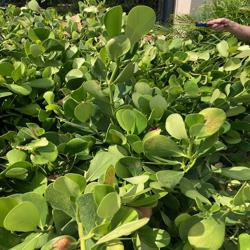
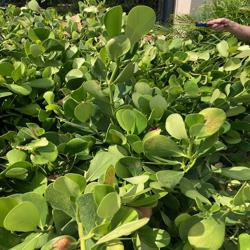
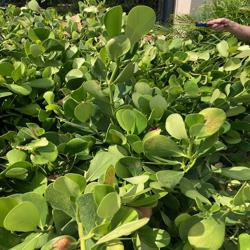
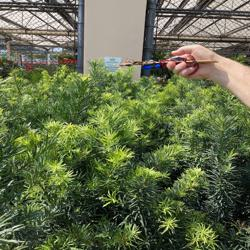
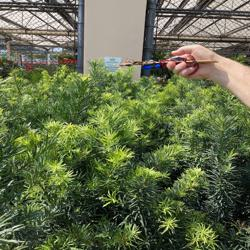
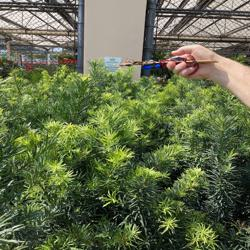
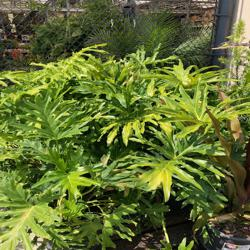
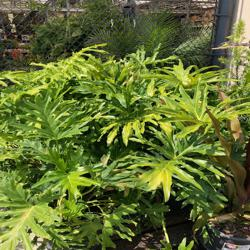
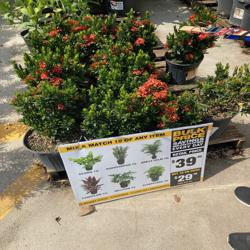
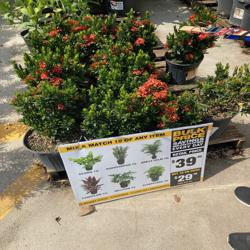
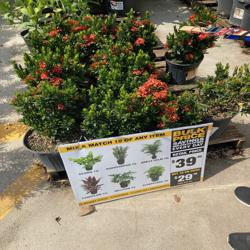
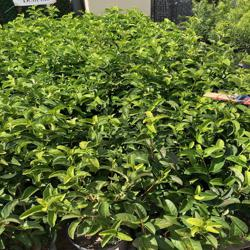
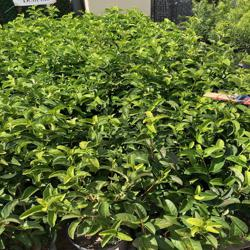
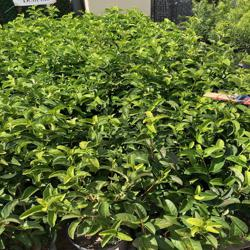
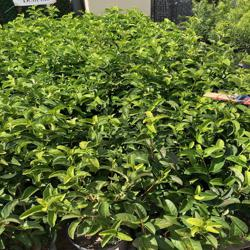
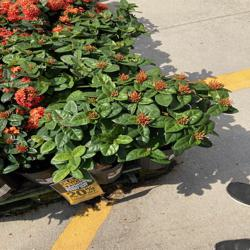
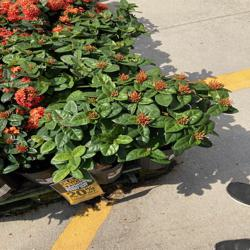
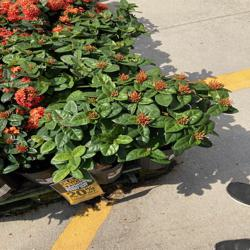
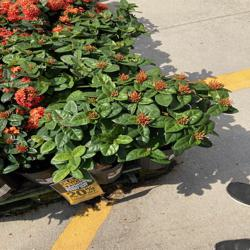
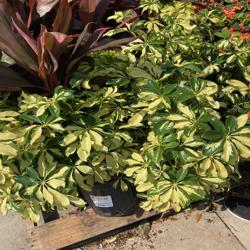
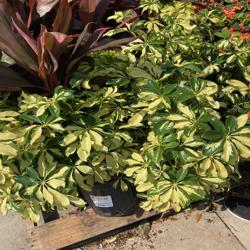
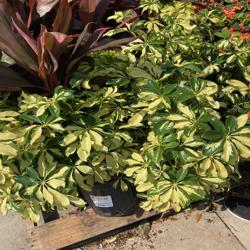
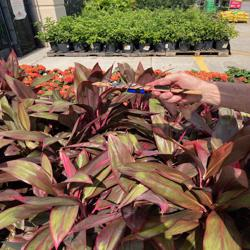
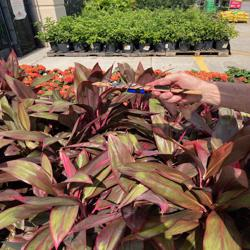
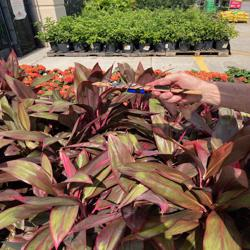
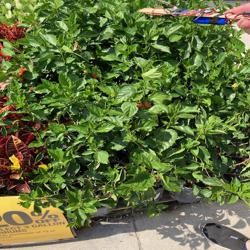
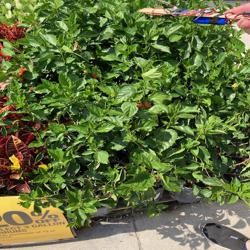
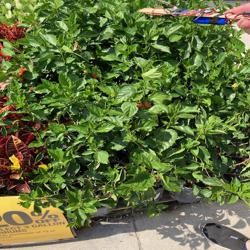
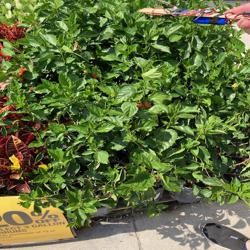
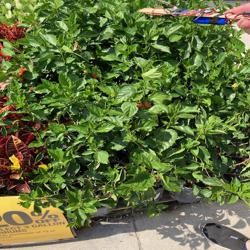
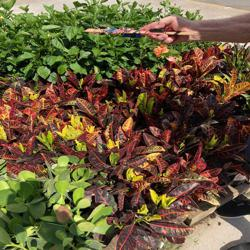
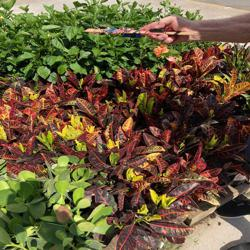
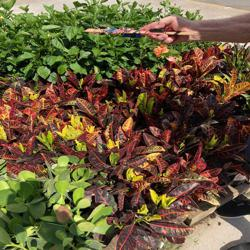
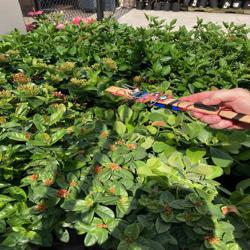
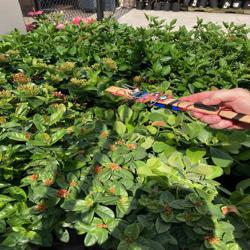
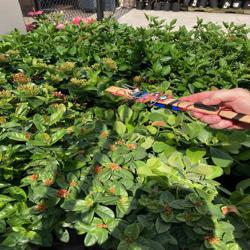
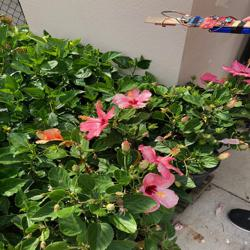
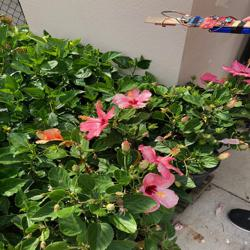
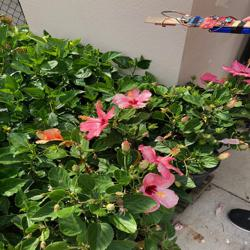
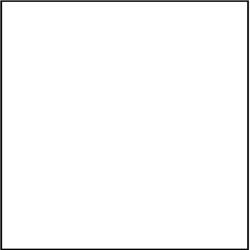

In [16]:
# Brush for selection
brush = alt.selection_interval()

# Main chart with dots and a dotted line
points = alt.Chart(df).mark_circle(size=200).encode(
    alt.X('Test_number:Q', scale=alt.Scale(domain=(0, 50))),
    alt.Y('NDVI:Q', scale=alt.Scale(domain=(0.0, 1))),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20')),  # Vivid colors using tableau20 scheme
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),
    tooltip=['image:N']
).properties(
    width=1000,
    height=200,
    title='NDVI for each STELLA Reading'
).add_selection(
    brush
)


line1 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q'),
)


line2 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q'),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20'))  # Vivid colors for the line
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),


)

chart = alt.layer(points, line1, line2).resolve_scale(y='shared')

# Image chart
imgs = alt.Chart(df).mark_image(width=50, height=50).encode(
    url='image:N'
).facet(
    alt.Facet('Test:N', title='Select STELLA Reading', header=alt.Header(labelFontSize=0)),
    columns=2
).transform_filter(
    brush
).transform_window(
    row_number='row_number()'
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank < 20
)


# Combine the charts
chart | imgs
